In [1]:
from google.colab import drive, files

drive.mount("/content/drive/", force_remount=False)

#Home directory:
%cd "/content/drive/My Drive/Test"

Mounted at /content/drive/
/content/drive/My Drive/Test


In [3]:
!ls

AirPassengers.csv


Caricamento del file

In [4]:
import pandas as pd

df = pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Parsing di una Time Series

In [5]:
df["Month"] = pd.to_datetime(df["Month"])
df = df.set_index("Month")
df = df.asfreq("MS")  # Monthly Start
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


debug

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


Time series visualization (proiezione temporale dei dati)

utile per la visualizzazione dei dati complessiva

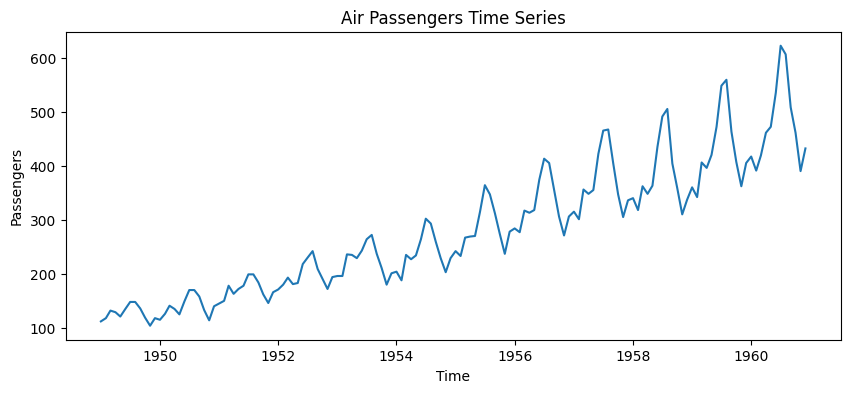

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df)
plt.title("Air Passengers Time Series")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.show()

Rolling statics (statistiche stazionarie)

serve a verificare se una serie è stazionaria:

se ha una media costante nel tempo, se la varianza è costante nel tempo

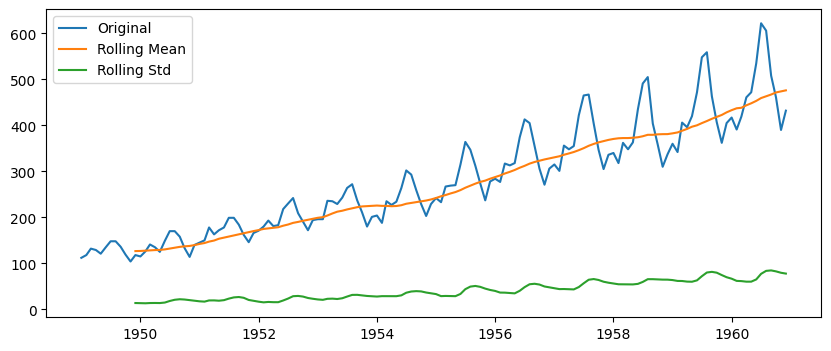

In [8]:
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()

plt.figure(figsize=(10,4))
plt.plot(df, label="Original")
plt.plot(rolling_mean, label="Rolling Mean")
plt.plot(rolling_std, label="Rolling Std")
plt.legend()
plt.show()

Da qui posso affermare che: la rolling mean non è orizzontale e la rolling std aumenta nel tempo e, di conseguenza, la serie non è stazionaria.
Entrambi i fattori considerati hanno un andamento crescente

Seasonal Decomposition (Decomposizione stagionale)

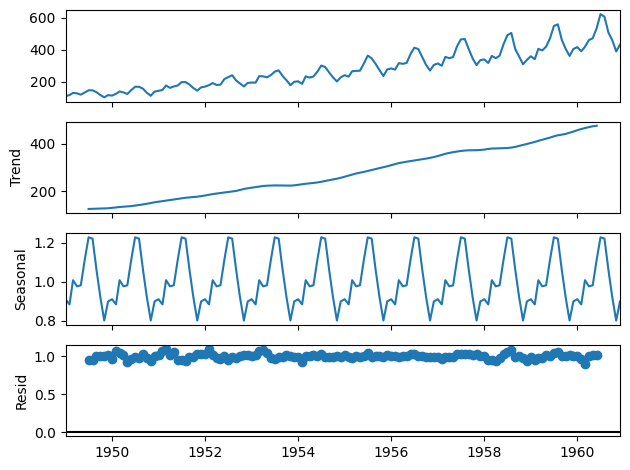

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, model="multiplicative")
decomposition.plot()
plt.show()